In [1]:
#載入套件
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('trading_statement.csv')

In [3]:
df.head()

,Item,Store,202201,202202,202203,202204,202205,202206,202207,202208,...,202212,202301,202302,202303,202304,202305,202306,202307,202308,202309
0,A,1,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,5.0,NaN,5.0,NaN,2.0
1,A,2,NaN,NaN,5.0,5.0,NaN,6.0,5.0,NaN,...,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN
2,A,3,15.0,20.0,20.0,35.0,20.0,27.0,21.0,NaN,...,20.0,5.0,10.0,50.0,10.0,30.0,10.0,30.0,15.0,10.0
3,A,4,NaN,20.0,10.0,20.0,10.0,20.0,20.0,NaN,...,10.0,20.0,NaN,20.0,NaN,30.0,0.0,NaN,40.0,NaN
4,A,5,NaN,NaN,10.0,10.0,10.0,10.0,NaN,20.0,...,5.0,NaN,20.0,NaN,25.0,20.0,10.0,NaN,20.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5393 entries, 0 to 5392
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Item    5393 non-null   object 
 1   Store   5393 non-null   int64  
 2   202201  942 non-null    float64
 3   202202  1010 non-null   float64
 4   202203  1074 non-null   float64
 5   202204  1954 non-null   float64
 6   202205  1447 non-null   float64
 7   202206  1623 non-null   float64
 8   202207  891 non-null    float64
 9   202208  832 non-null    float64
 10  202209  1000 non-null   float64
 11  202210  1516 non-null   float64
 12  202211  1531 non-null   float64
 13  202212  1366 non-null   float64
 14  202301  1276 non-null   float64
 15  202302  1425 non-null   float64
 16  202303  1992 non-null   float64
 17  202304  2498 non-null   float64
 18  202305  1357 non-null   float64
 19  202306  1126 non-null   float64
 20  202307  1604 non-null   float64
 21  202308  1366 non-null   float64
 22  

In [5]:
#查看各欄有多少數值為0
zero_values = (df == 0).sum()
zero_count = zero_values[zero_values > 0]
print(zero_count)

202201     4
202202     5
202203     2
202205     2
202207     2
202209     2
202210    11
202301     3
202302     4
202303     1
202304     2
202305     6
202306    36
202307    11
202308    41
202309    56
dtype: int64


In [6]:
# 各品項總交易數
item_groups = df.groupby('Item').sum()
item_groups.drop(columns=['Store'], inplace=True)
item_groups

,202201,202202,202203,202204,202205,202206,202207,202208,202209,202210,...,202212,202301,202302,202303,202304,202305,202306,202307,202308,202309
Item,,,,,,,,,,,,,,,,,,,,,
A,4162.0,3966.0,4438.0,14128.0,10814.0,14691.0,13709.0,3383.0,4103.0,4284.0,...,6619.0,5293.0,8227.0,11687.0,33545.0,2365.0,3117.0,3577.0,4350.0,4100.0
B,3650.0,3527.0,3493.0,14279.0,11315.0,14055.0,10757.0,6902.0,3133.0,3840.0,...,5709.0,4711.0,7788.0,14827.0,35019.0,865.0,3040.0,2791.0,3374.0,2714.0
C,3279.0,2749.0,3505.0,11263.0,8087.0,11111.0,10200.0,2616.0,2551.0,3237.0,...,4548.0,3932.0,6273.0,9582.0,25299.0,1661.0,2010.0,2520.0,3358.0,2914.0
D,1965.0,1857.0,2323.0,7733.0,5371.0,6708.0,6236.0,1647.0,1687.0,2001.0,...,3222.0,2420.0,4153.0,5947.0,16537.0,828.0,1385.0,1373.0,1929.0,1618.0
E,181.0,113.0,370.0,770.0,551.0,798.0,207.0,950.0,0.0,242.0,...,280.0,201.0,220.0,1136.0,1639.0,357.0,380.0,266.0,265.0,235.0
F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1068.0,...,654.0,197.0,240.0,457.0,934.0,1196.0,1573.0,1348.0,1299.0,377.0
G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1598.0,...,1605.0,0.0,0.0,3919.0,3883.0,3540.0,-1.0,6995.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,623.0,...,428.0,133.0,109.0,227.0,467.0,401.0,472.0,308.0,671.0,454.0


In [7]:
item_groups.to_csv('item_groups.csv', encoding='utf-8-sig', index=False)

# ________

In [8]:
item_groups = pd.read_csv('item_groups.csv')
item_groups_1 = item_groups.T
item_groups_1 = item_groups_1.reset_index()
item_groups_1 = item_groups_1.rename(columns={'index': 'Date'})

item_groups_1

,Date,0,1,2,3,4,5,6,7
0,202201,4162.0,3650.0,3279.0,1965.0,181.0,0.0,0.0,0.0
1,202202,3966.0,3527.0,2749.0,1857.0,113.0,0.0,0.0,0.0
2,202203,4438.0,3493.0,3505.0,2323.0,370.0,0.0,0.0,0.0
3,202204,14128.0,14279.0,11263.0,7733.0,770.0,0.0,0.0,0.0
4,202205,10814.0,11315.0,8087.0,5371.0,551.0,0.0,0.0,0.0
5,202206,14691.0,14055.0,11111.0,6708.0,798.0,0.0,0.0,0.0
6,202207,13709.0,10757.0,10200.0,6236.0,207.0,0.0,0.0,0.0
7,202208,3383.0,6902.0,2616.0,1647.0,950.0,0.0,0.0,0.0
8,202209,4103.0,3133.0,2551.0,1687.0,0.0,0.0,0.0,0.0
9,202210,4284.0,3840.0,3237.0,2001.0,242.0,1068.0,1598.0,623.0


In [9]:
item_groups = pd.read_csv('items.csv')
item_groups

,Date,A,B,C,D,E,F,G,H
0,202201,4162,3650,3279,1965,181,0,0,0
1,202202,3966,3527,2749,1857,113,0,0,0
2,202203,4438,3493,3505,2323,370,0,0,0
3,202204,14128,14279,11263,7733,770,0,0,0
4,202205,10814,11315,8087,5371,551,0,0,0
5,202206,14691,14055,11111,6708,798,0,0,0
6,202207,13709,10757,10200,6236,207,0,0,0
7,202208,3383,6902,2616,1647,950,0,0,0
8,202209,4103,3133,2551,1687,0,0,0,0
9,202210,4284,3840,3237,2001,242,1068,1598,623


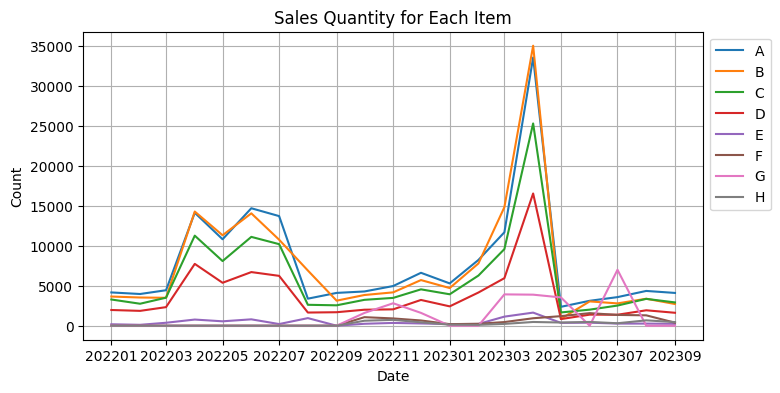

In [10]:
import matplotlib.dates as mdates

# 假设 'Date' 列的格式为 "202201"
item_groups['Date'] = pd.to_datetime(item_groups['Date'], format='%Y%m')

plt.figure(figsize=(8, 4))
items = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
for item in items:
    sns.lineplot(data=item_groups, x='Date', y=item, label=item, markers=True)

# 使用mdates库设置日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m'))

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Sales Quantity for Each Item')
#plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.grid(True)
plt.show()


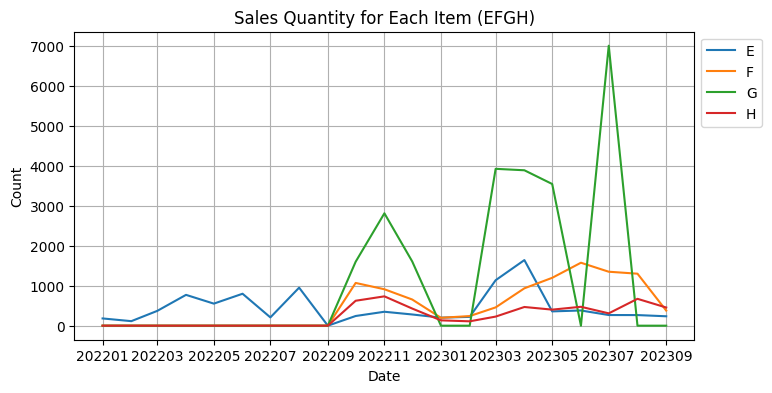

In [11]:
# 假设 'Date' 列的格式为 "202201"
item_groups['Date'] = pd.to_datetime(item_groups['Date'], format='%Y%m')

plt.figure(figsize=(8, 4))
items = ['E', 'F', 'G', 'H']
for item in items:
    sns.lineplot(data=item_groups, x='Date', y=item, label=item, markers=True)

# 使用mdates库设置日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m'))

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Sales Quantity for Each Item (EFGH)')
#plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.grid(True)
plt.show()

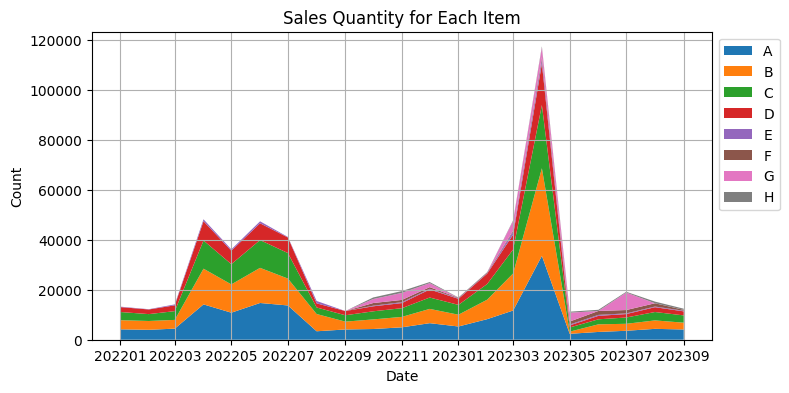

In [12]:
# 假设 'Date' 列的格式为 "202201"
item_groups['Date'] = pd.to_datetime(item_groups['Date'], format='%Y%m')

plt.figure(figsize=(8, 4))
items = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# 获取堆叠图的数据
stack_data = [item_groups[item] for item in items]

# 绘制堆叠图
plt.stackplot(item_groups['Date'], stack_data, labels=items)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m'))

# 旋转 x 轴上的日期文字
#plt.xticks(rotation='vertical')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Sales Quantity for Each Item')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [13]:
item_groups_sum = item_groups.drop(columns=['Date']).sum(axis=0)
item_groups_sum

A    165520
B    159961
C    124175
D     78987
E      9509
F     10253
G     24347
H      5026
dtype: int64

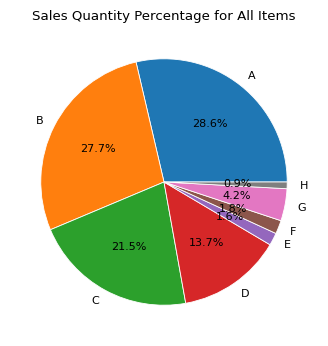

In [14]:
# Assuming item_groups_sum is a pandas Series
index = item_groups_sum.index
#colors = ['blue', 'orange', 'green', 'red', 'purple']  # Example colors, you can customize these

# Define pie chart
fig = plt.figure(figsize=(6, 4))
plt.rcParams['font.size'] = 8

# Pie chart for total values
plt.pie(item_groups_sum, labels=index, autopct='%1.1f%%', radius=1,
         wedgeprops={"linewidth": 0.6, "edgecolor": "white"})
plt.title('Sales Quantity Percentage for All Items')
plt.show()


# __________

In [15]:
df = pd.read_csv('trading_statement.csv')

In [16]:
df

,Item,Store,202201,202202,202203,202204,202205,202206,202207,202208,...,202212,202301,202302,202303,202304,202305,202306,202307,202308,202309
0,A,1,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,5.0,NaN,5.0,NaN,2.0
1,A,2,NaN,NaN,5.0,5.0,NaN,6.0,5.0,NaN,...,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN
2,A,3,15.0,20.0,20.0,35.0,20.0,27.0,21.0,NaN,...,20.0,5.0,10.0,50.0,10.0,30.0,10.0,30.0,15.0,10.0
3,A,4,NaN,20.0,10.0,20.0,10.0,20.0,20.0,NaN,...,10.0,20.0,NaN,20.0,NaN,30.0,0.0,NaN,40.0,NaN
4,A,5,NaN,NaN,10.0,10.0,10.0,10.0,NaN,20.0,...,5.0,NaN,20.0,NaN,25.0,20.0,10.0,NaN,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,H,1027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5389,H,1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
5390,H,1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5391,H,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN


In [17]:
# 各品項總交易數
store_groups = df.groupby('Store').sum()
store_groups

,Item,202201,202202,202203,202204,202205,202206,202207,202208,202209,...,202212,202301,202302,202303,202304,202305,202306,202307,202308,202309
Store,,,,,,,,,,,,,,,,,,,,,
1,ABCD,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,10.0,0.0,12.0,0.0,10.0
2,ABCDEF,0.0,0.0,13.0,12.0,0.0,26.0,10.0,0.0,11.0,...,0.0,20.0,0.0,20.0,0.0,0.0,0.0,0.0,21.0,0.0
3,ABCDEFGH,45.0,60.0,67.0,135.0,80.0,122.0,70.0,5.0,55.0,...,60.0,33.0,40.0,136.0,62.0,116.0,39.0,106.0,30.0,59.0
4,ABCDG,0.0,60.0,40.0,70.0,40.0,80.0,60.0,40.0,40.0,...,30.0,70.0,0.0,50.0,0.0,100.0,20.0,40.0,130.0,0.0
5,ABCD,0.0,0.0,20.0,40.0,45.0,40.0,0.0,60.0,0.0,...,20.0,0.0,40.0,0.0,40.0,40.0,50.0,0.0,60.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0
1029,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1030,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0


In [18]:
store_groups_tot = store_groups.drop(columns=['Item'])
# Sum values of each row
store_groups['Total_Sales'] = store_groups_tot.sum(axis=1)
print(len(store_groups))
store_groups

1032


,Item,202201,202202,202203,202204,202205,202206,202207,202208,202209,...,202301,202302,202303,202304,202305,202306,202307,202308,202309,Total_Sales
Store,,,,,,,,,,,,,,,,,,,,,
1,ABCD,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,10.0,0.0,12.0,0.0,10.0,52.0
2,ABCDEF,0.0,0.0,13.0,12.0,0.0,26.0,10.0,0.0,11.0,...,20.0,0.0,20.0,0.0,0.0,0.0,0.0,21.0,0.0,165.0
3,ABCDEFGH,45.0,60.0,67.0,135.0,80.0,122.0,70.0,5.0,55.0,...,33.0,40.0,136.0,62.0,116.0,39.0,106.0,30.0,59.0,1478.0
4,ABCDG,0.0,60.0,40.0,70.0,40.0,80.0,60.0,40.0,40.0,...,70.0,0.0,50.0,0.0,100.0,20.0,40.0,130.0,0.0,920.0
5,ABCD,0.0,0.0,20.0,40.0,45.0,40.0,0.0,60.0,0.0,...,0.0,40.0,0.0,40.0,40.0,50.0,0.0,60.0,0.0,495.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,15.0
1029,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0
1030,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,28.0


count     1032.000000
mean       559.862403
std       1581.763053
min          0.000000
25%         71.750000
50%        204.500000
75%        492.500000
max      28490.000000
Name: Total_Sales, dtype: float64


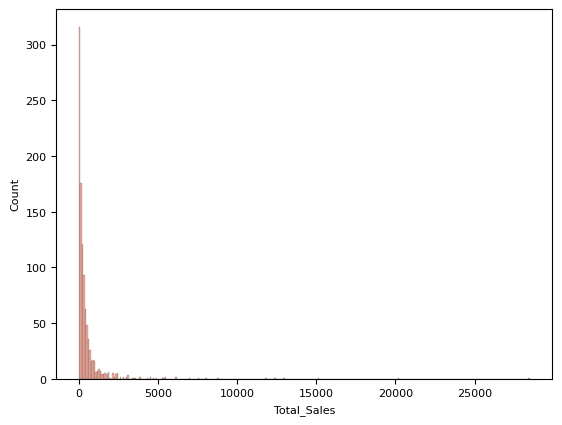

In [19]:
print(store_groups['Total_Sales'].describe())

figsize=(8, 4)
sns.histplot(store_groups['Total_Sales'], color='#F19483', bins=300)
plt.show()

In [20]:
store_groups_sorted = store_groups.sort_values('Total_Sales', ascending=False)
store_top = store_groups_sorted.head(10)
store_top

,Item,202201,202202,202203,202204,202205,202206,202207,202208,202209,...,202301,202302,202303,202304,202305,202306,202307,202308,202309,Total_Sales
Store,,,,,,,,,,,,,,,,,,,,,
742,ABCDEFGH,60.0,40.0,0.0,1480.0,2700.0,1400.0,5600.0,500.0,0.0,...,10.0,0.0,1600.0,10000.0,70.0,25.0,30.0,65.0,110.0,28490.0
89,ABCDE,1450.0,390.0,790.0,2160.0,1120.0,2200.0,1500.0,506.0,0.0,...,900.0,2006.0,2400.0,2800.0,0.0,0.0,3.0,0.0,0.0,20150.0
743,ABCDEFGH,0.0,0.0,110.0,450.0,1500.0,400.0,7400.0,600.0,0.0,...,0.0,0.0,800.0,3700.0,0.0,150.0,0.0,25.0,0.0,15135.0
66,ABCDEFGH,20.0,30.0,422.0,1443.0,832.0,602.0,630.0,2886.0,-800.0,...,633.0,330.0,1347.0,3632.0,82.0,30.0,50.0,3.0,50.0,12936.0
745,ABCDEFG,0.0,0.0,70.0,1600.0,1000.0,1400.0,2000.0,0.0,0.0,...,240.0,1700.0,730.0,3450.0,100.0,0.0,60.0,0.0,0.0,12350.0
534,ABCDEFGH,386.0,320.0,454.0,792.0,708.0,944.0,724.0,203.0,337.0,...,440.0,423.0,608.0,3460.0,45.0,6.0,76.0,51.0,252.0,11816.0
540,ABCDEFG,680.0,395.0,325.0,960.0,1000.0,510.0,1480.0,190.0,510.0,...,50.0,130.0,410.0,1720.0,0.0,70.0,0.0,100.0,30.0,8780.0
795,ABCDFGH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,410.0,130.0,570.0,5440.0,0.0,0.0,100.0,60.0,0.0,8010.0
508,ABCDEFGH,200.0,270.0,230.0,680.0,400.0,240.0,730.0,110.0,130.0,...,360.0,562.0,558.0,1177.0,30.0,75.0,395.0,315.0,100.0,7512.0


22.87885658505516
{'Top10 Sales Quantity': 22.87885658505516, 'Other Sales Quantity': -21.87885658505516}


TypeError: float() argument must be a string or a number, not 'dict'

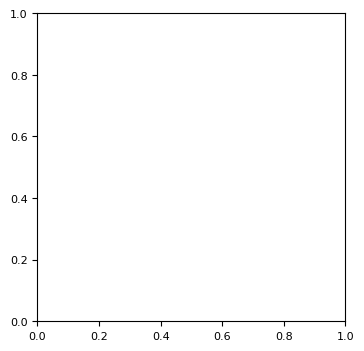

In [21]:
store_top_10 = store_groups_sorted.head(10)
sales_total_10 = (store_top_10['Total_Sales'].sum()) / (store_groups['Total_Sales'].sum()) * 100
print(sales_total_10)

# Assuming item_groups_sum is a pandas Series
label = ['Top10 Sales Quantity', 'Other Sales Quantity']
sales_total_10_dict = {'Top10 Sales Quantity': sales_total_10, 'Other Sales Quantity': (1-sales_total_10)}
print(sales_total_10_dict)

# Define pie chart
fig = plt.figure(figsize=(6, 4))
plt.rcParams['font.size'] = 8

# Pie chart for total values
plt.pie(sales_total_10_dict, labels=label, autopct='%1.1f%%', radius=1,
         wedgeprops={"linewidth": 0.6, "edgecolor": "white"})
plt.title('Sales Quantity Percentage for All Items')
plt.show()



22.87885658505516
{'Top10 Sales Quantity': 22.87885658505516, 'Other Sales Quantity': 77.12114341494484}


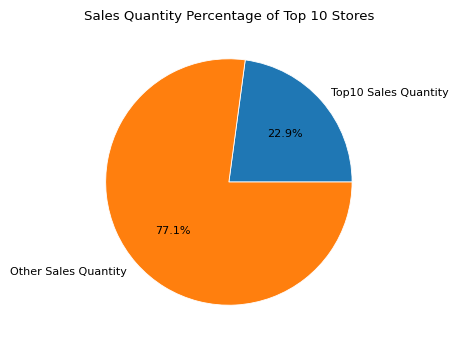

In [27]:
store_top_10 = store_groups_sorted.head(10)
sales_total_10 = (store_top_10['Total_Sales'].sum()) / (store_groups['Total_Sales'].sum()) * 100
print(sales_total_10)

# Assuming item_groups_sum is a pandas Series
label = ['Top10 Sales Quantity', 'Other Sales Quantity']
sales_total_10_dict = {'Top10 Sales Quantity': sales_total_10, 'Other Sales Quantity': (100 - sales_total_10)}
print(sales_total_10_dict)

# Define pie chart
fig = plt.figure(figsize=(6, 4))
plt.rcParams['font.size'] = 8

# Pie chart for total values
plt.pie(sales_total_10_dict.values(), labels=label, autopct='%1.1f%%', radius=1,
        wedgeprops={"linewidth": 0.6, "edgecolor": "white"})
plt.title('Sales Quantity Percentage of Top 10 Stores')
plt.show()


In [28]:
store_top_20 = store_groups_sorted.head(20)
sales_total_20 = (store_top_20['Total_Sales'].sum()) / (store_groups['Total_Sales'].sum()) * 100
print(sales_total_20)

31.97629539373254


In [29]:
# Drop the 'Item' column from store_top
store_top_plot = store_top.drop(columns=['Item','Total_Sales']).T

# Reset the index
store_top_plot = store_top_plot.reset_index()

# Rename the 'Store' column to 'Date'
store_top_plot = store_top_plot.rename(columns={'index': 'Date', 'Store': 'index'})

store_top_plot

Store,Date,742,89,743,66,745,534,540,795,508,429
0,202201,60.0,1450.0,0.0,20.0,0.0,386.0,680.0,0.0,200.0,30.0
1,202202,40.0,390.0,0.0,30.0,0.0,320.0,395.0,0.0,270.0,180.0
2,202203,0.0,790.0,110.0,422.0,70.0,454.0,325.0,0.0,230.0,110.0
3,202204,1480.0,2160.0,450.0,1443.0,1600.0,792.0,960.0,0.0,680.0,400.0
4,202205,2700.0,1120.0,1500.0,832.0,1000.0,708.0,1000.0,0.0,400.0,1400.0
5,202206,1400.0,2200.0,400.0,602.0,1400.0,944.0,510.0,0.0,240.0,1600.0
6,202207,5600.0,1500.0,7400.0,630.0,2000.0,724.0,1480.0,0.0,730.0,0.0
7,202208,500.0,506.0,600.0,2886.0,0.0,203.0,190.0,0.0,110.0,0.0
8,202209,0.0,0.0,0.0,-800.0,0.0,337.0,510.0,0.0,130.0,0.0
9,202210,0.0,322.0,0.0,85.0,0.0,490.0,20.0,320.0,410.0,0.0


In [30]:
store_names = list(store_top_plot.columns)
store_names = store_names[1:]
store_names

[742, 89, 743, 66, 745, 534, 540, 795, 508, 429]

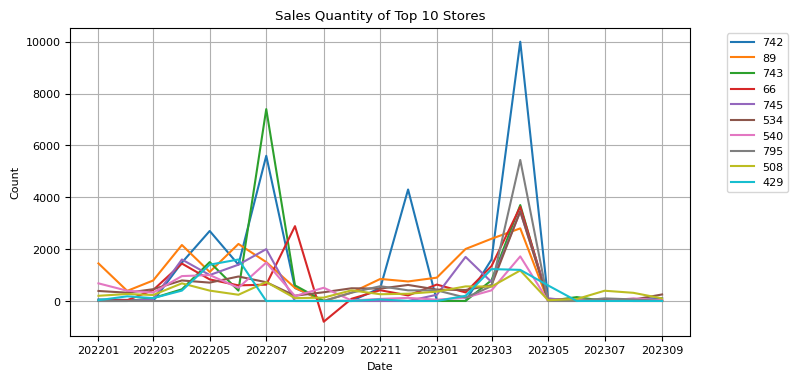

In [40]:
import matplotlib.dates as mdates

# 假设 'Date' 列的格式为 "202201"
store_top_plot['Date'] = pd.to_datetime(store_top_plot['Date'], format='%Y%m')

plt.figure(figsize=(8, 4))
items = store_names

for item in items:
    sns.lineplot(data=store_top_plot, x='Date', y=item, label=item, markers=True)

# 使用mdates库设置日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m'))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Sales Quantity of Top 10 Stores')
#plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.grid(True)
plt.show()

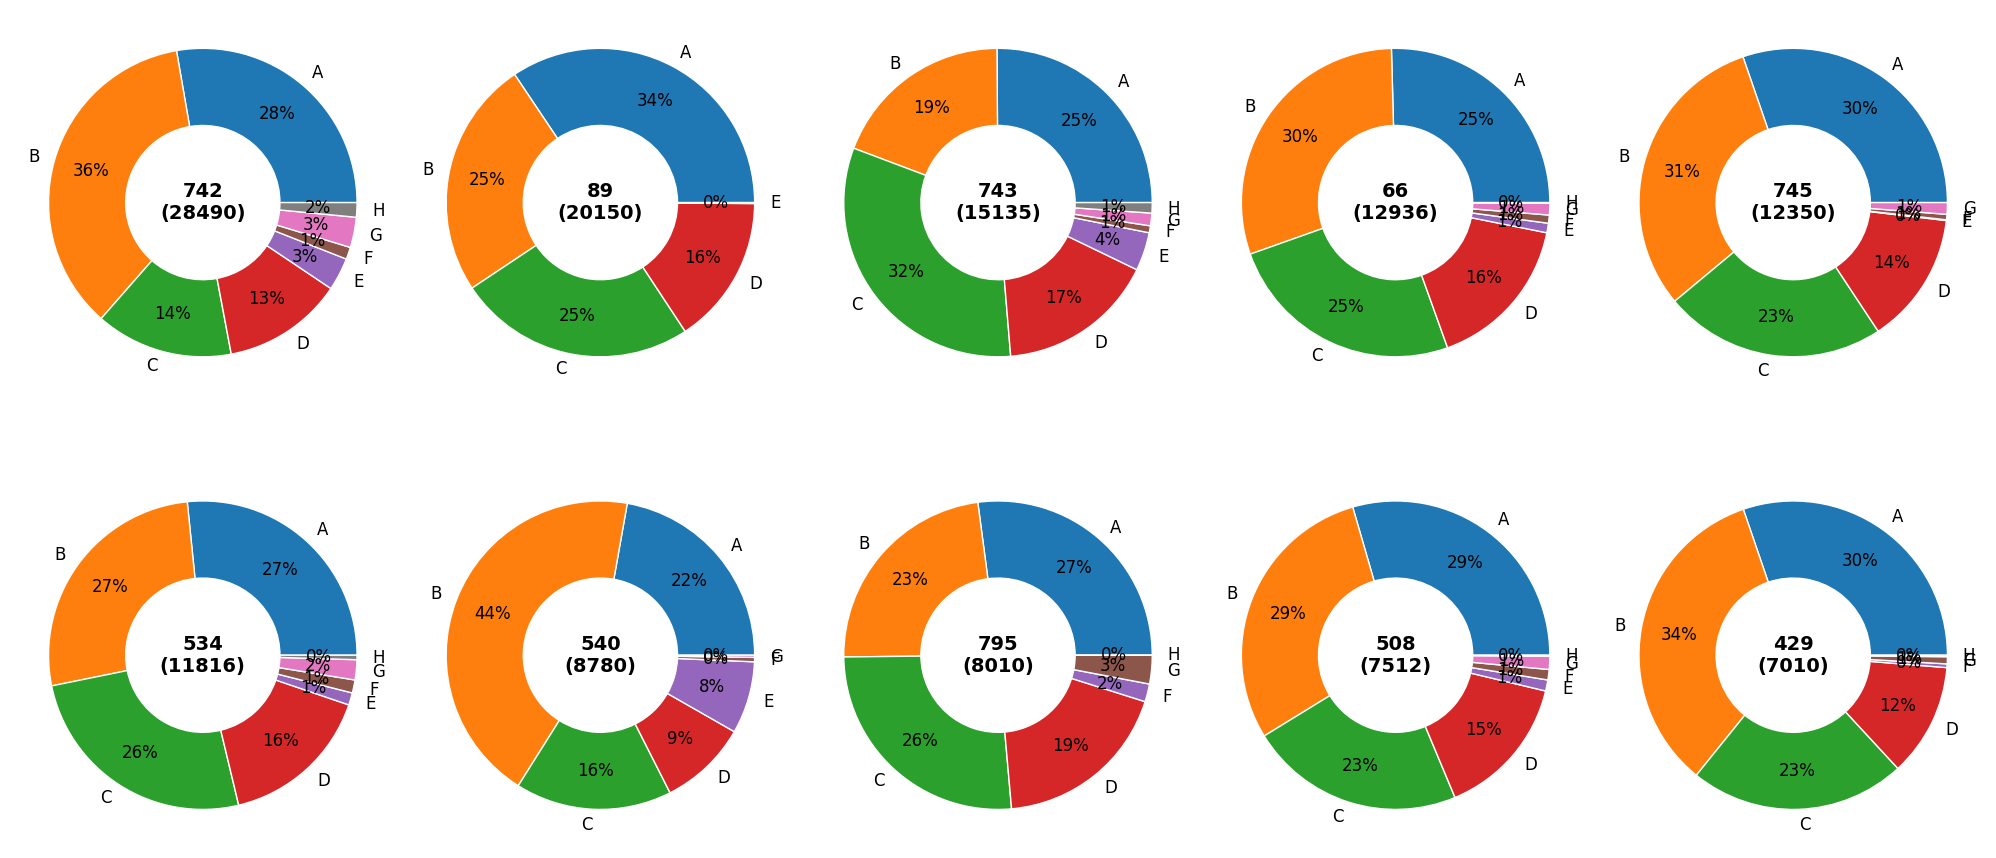

In [76]:
num_stores = len(store_names)
num_cols = 5  # ste the columns
num_rows = num_stores // num_cols + (num_stores % num_cols > 0)  # calculate rows


plt.figure(figsize=(20, num_rows * 5)) 


store_groups = df.groupby('Store')

for i, (store_name, store_group) in enumerate(store_groups):
    if store_name in store_names:
        store_group['Total_Sale_Item'] = store_group.drop(columns=['Store', 'Item']).sum(axis=1)
        #print(store_name)
        sales = int(store_group['Total_Sale_Item'].sum())
        plt_name = str(store_name) + '\n(' + str(sales) + ')'
        plt.subplot(num_rows, num_cols, store_names.index(store_name)+1)        
        plt.pie(store_group['Total_Sale_Item'], labels=store_group['Item'], autopct='%.0f%%', radius=1, pctdistance=0.75, wedgeprops={'width': 0.5, 'edgecolor': 'w'}, textprops={'fontsize': 12})
        plt.text(0, 0, plt_name, horizontalalignment='center', verticalalignment='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [97]:
for i, (store_name, store_group) in enumerate(store_groups):
    if store_name == 742:
        item_groups = store_group.drop(columns=['Store']).rename(columns={'Item':'Date'}).T
        item_groups = item_groups.reset_index()
        print(item_groups)
item_groups.to_csv('store_group.csv', encoding='utf-8-sig', index=False)

     index     741    1619    2529    3382   3740   4204   4811   5281
0     Date       A       B       C       D      E      F      G      H
1   202201     NaN     NaN     NaN     NaN   60.0    NaN    NaN    NaN
2   202202     NaN    20.0     NaN     NaN   20.0    NaN    NaN    NaN
3   202203     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN
4   202204   300.0   180.0   300.0   500.0  200.0    NaN    NaN    NaN
5   202205  1000.0   800.0   600.0   300.0    NaN    NaN    NaN    NaN
6   202206   600.0   600.0   200.0     NaN    NaN    NaN    NaN    NaN
7   202207  1200.0  2800.0  1000.0   600.0    NaN    NaN    NaN    NaN
8   202208     NaN     NaN     NaN     NaN  500.0    NaN    NaN    NaN
9   202209     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN
10  202210     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN
11  202211     NaN     NaN     NaN     NaN    NaN  140.0  220.0  140.0
12  202212  1400.0  1000.0   600.0   800.0    NaN  170.0  210.0  120.0
13  20

In [118]:
store_group = pd.read_csv('store_group.csv')
store_group = store_group.reset_index(drop=True)  # 重置索引并删除原索引列
new_header = store_group.iloc[0]  # 选择新的表头
store_group = store_group[1:]  # 删除原始的表头行
store_group.columns = new_header  # 将新表头设置为列名
store_group

,Date,A,B,C,D,E,F,G,H
1,202201,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
2,202202,NaN,20.0,NaN,NaN,20.0,NaN,NaN,NaN
3,202203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202204,300.0,180.0,300.0,500.0,200.0,NaN,NaN,NaN
5,202205,1000.0,800.0,600.0,300.0,NaN,NaN,NaN,NaN
6,202206,600.0,600.0,200.0,NaN,NaN,NaN,NaN,NaN
7,202207,1200.0,2800.0,1000.0,600.0,NaN,NaN,NaN,NaN
8,202208,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN
9,202209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,202210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


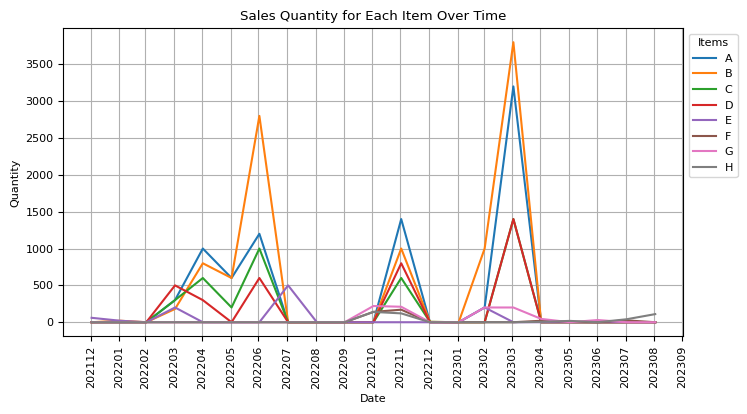

In [125]:
# 假设 store_group 包含处理后的数据
store_group = store_group.fillna(0)
store_group['Date'] = pd.to_datetime(store_group['Date'], format='%Y%m')

# 将数据进行适当的转换，melt 函数可以将宽格式转换为长格式
store_group_long = pd.melt(store_group, id_vars=['Date'], value_vars=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], var_name='Item', value_name='Quantity')

# 绘制线图
plt.figure(figsize=(8, 4))
sns.lineplot(data=store_group_long, x='Date', y='Quantity', hue='Item', markers=True)

# 使用mdates库设置日期格式
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m'))

plt.title('Sales Quantity for Each Item Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend(title='Items', bbox_to_anchor=(1, 1), loc='upper left')

# 反转 y 轴刻度
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [31]:
# 各品項銷售數量%
df = pd.read_csv('trading_statement.csv')
df

,Item,Store,202201,202202,202203,202204,202205,202206,202207,202208,...,202212,202301,202302,202303,202304,202305,202306,202307,202308,202309
0,A,1,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,5.0,NaN,5.0,NaN,2.0
1,A,2,NaN,NaN,5.0,5.0,NaN,6.0,5.0,NaN,...,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN
2,A,3,15.0,20.0,20.0,35.0,20.0,27.0,21.0,NaN,...,20.0,5.0,10.0,50.0,10.0,30.0,10.0,30.0,15.0,10.0
3,A,4,NaN,20.0,10.0,20.0,10.0,20.0,20.0,NaN,...,10.0,20.0,NaN,20.0,NaN,30.0,0.0,NaN,40.0,NaN
4,A,5,NaN,NaN,10.0,10.0,10.0,10.0,NaN,20.0,...,5.0,NaN,20.0,NaN,25.0,20.0,10.0,NaN,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,H,1027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5389,H,1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
5390,H,1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5391,H,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN


In [33]:
df_store = pd.DataFrame()
store_groups = df.groupby('Store')
for i, (store_name, store_group) in enumerate(store_groups):
    store_group['Item_Sales'] = store_group.drop(columns=['Item','Store']).sum(axis=1)
    store_group['Store_Total_Sales'] = store_group['Item_Sales'].sum(axis=0)
    store_group['Percentage_Store'] = store_group['Item_Sales'] / store_group['Store_Total_Sales'] *100
    store_group['Num_Items'] = len(store_group)
    #store_group['A_Percentage'] = len(store_group)
    #store_group['G_Percentage'] = len(store_group)
    
    data = store_group[['Item', 'Store', 'Item_Sales', 'Store_Total_Sales', 'Percentage_Store', 'Num_Items']]
    df_store = pd.concat([df_store, data])

print(df_store)
len(df_store)
    

     Item  Store  Item_Sales  Store_Total_Sales  Percentage_Store  Num_Items
0       A      1        26.0               52.0         50.000000          4
911     B      1        13.0               52.0         25.000000          4
1812    C      1        10.0               52.0         19.230769          4
2699    D      1         3.0               52.0          5.769231          4
1       A      2        43.0              165.0         26.060606          6
...   ...    ...         ...                ...               ...        ...
4962    G   1028        15.0               15.0        100.000000          1
5389    H   1029        10.0               10.0        100.000000          1
5390    H   1030        28.0               28.0        100.000000          1
5391    H   1031        10.0               10.0        100.000000          1
5392    H   1032        20.0               20.0        100.000000          1

[5393 rows x 6 columns]


5393

In [37]:
#查看各欄位缺失植數量
zero_values = (df_store['Store_Total_Sales'] < 1).sum()
missing_value_true = zero_values[zero_values > 0]
print(missing_value_true)

[7]


In [24]:
store_groups = df_store.groupby('Store')
for i, (store_name, store_group) in enumerate(store_groups):
    print(store_group['Percentage_Store'].idxmax())
    max_percentage_item = store_group.loc[store_group['Percentage_Store'].idxmax(), 'Item']
    store_group['Main_Item'] = max_percentage_item
    
    data = store_group[['Item', 'Store', 'Item_Sales','Store_Total_Sales', 'Percentage_Store', 'Num_Items', 'Main_Item']]
    df_store = pd.concat([df_store, data])

print(df_store)
len(df_store)

0
912
1814
1815
4
5
6
7
8
9
10
11
12
1824
925
15
16
17
18
930
20
932
1833
1834
24
25
26
27
939
940
4375
31
942
2729
1845
35
36
1848
1849
39
40
41
1853
953
44
45
46
957
958
1860
50
51
52
1864
4395
55
965
966
58
968
969
61
62
63
973
974
975
67
977
978
979
980
72
73
983
75
76
1887
78
79
80
1891
82
1893
84
994
1896
996
88
89
1900
1901
92
93
3571
1003
96
97
98
99
2790
101
102
103
104
1912
1012
107
108
109
110
111
1018
113
114
115
4428
3580
1024
119
1026
1927
1928
1929
124
125
126
127
128
129
1036
131
132
133
134
135
1942
1943
138
139
140
141
1948
143
144
1050
146
1052
148
1955
1956
151
152
1959
154
155
156
1061
1062
159
160
1065
162
1969
1068
165
166
1071
168
169
3886
171
172
1077
174
1079
176
1081
2866
179
180
181
1085
183
1087
185
186
1090
188
189
1093
1094
4476
1999
194
2001
196
197
2004
199
1103
201
202
203
2010
1108
1109
2013
208
209
1113
211
2018
213
214
215
216
217
218
4493
220
1124
1125
1126
224
225
1129
1130
228
229
1133
231
232
233
2040
2041
236
2043
2044
239
240
241
242
243
244
2

KeyError: nan

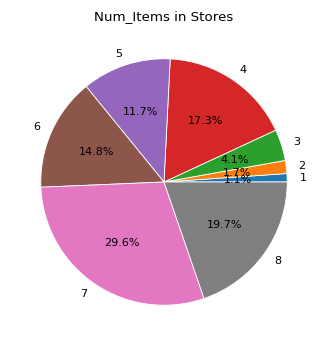

In [5]:
# Define pie chart
fig = plt.figure(figsize=(6, 4))
plt.rcParams['font.size'] = 8

num_items_group = df_store.groupby('Num_Items').count()

# Pie chart for total values
plt.pie(num_items_group['Item'], labels=num_items_group.index, autopct='%1.1f%%', radius=1,
        wedgeprops={"linewidth": 0.6, "edgecolor": "white"})
plt.title('Num_Items in Stores')
plt.show()



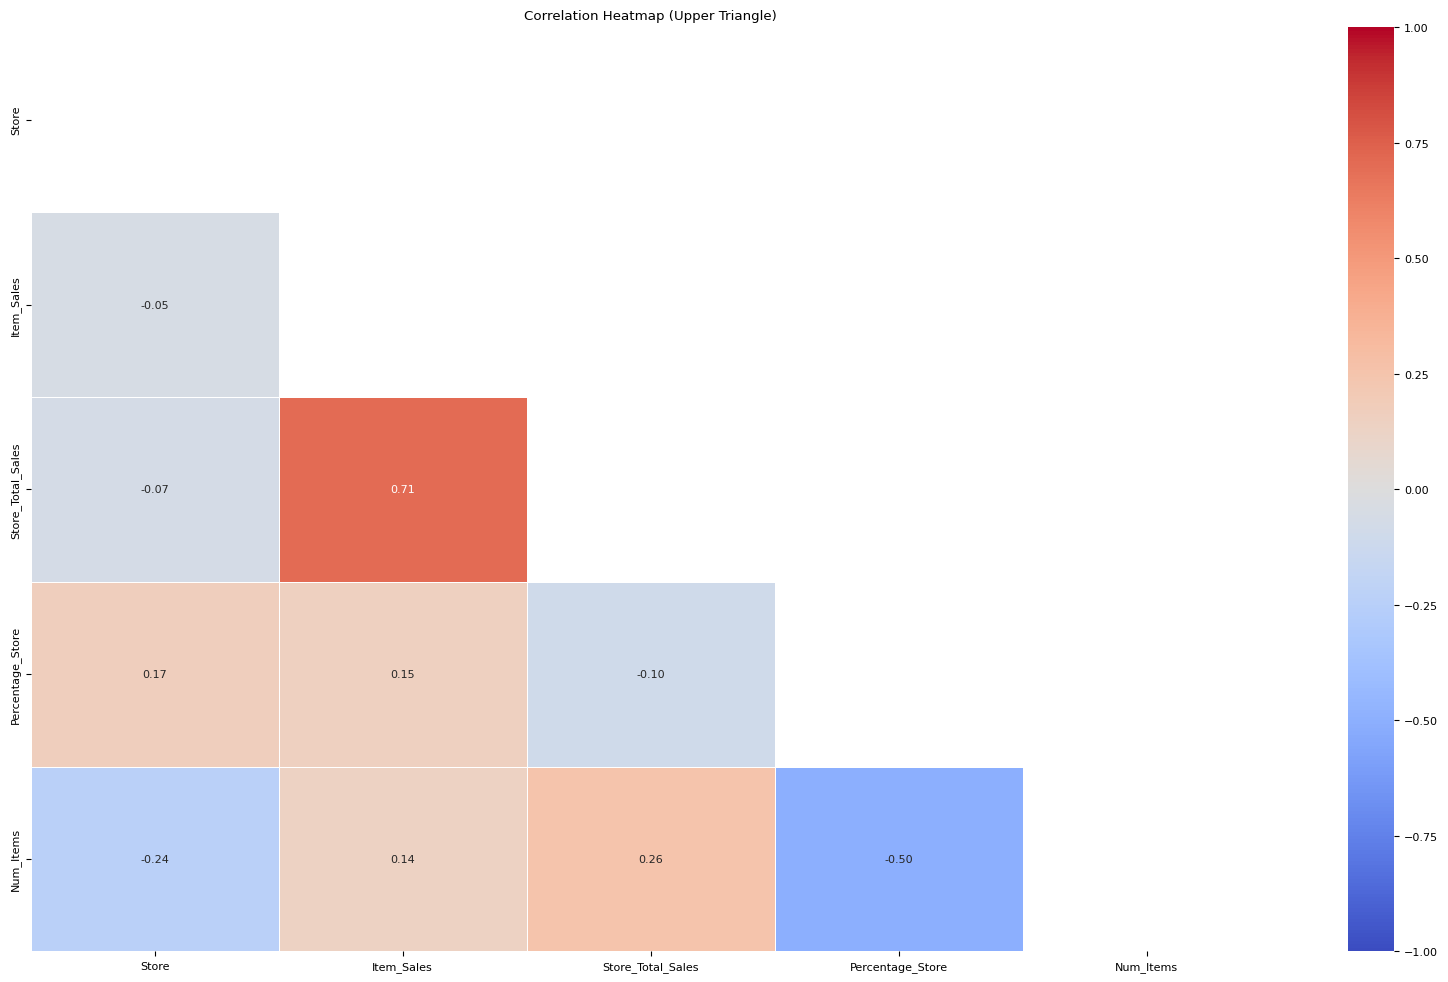

In [6]:
import plot_analysis as pa
# Calculate the correlation coefficient matrix
pa.all_corr_heatmap(df_store)

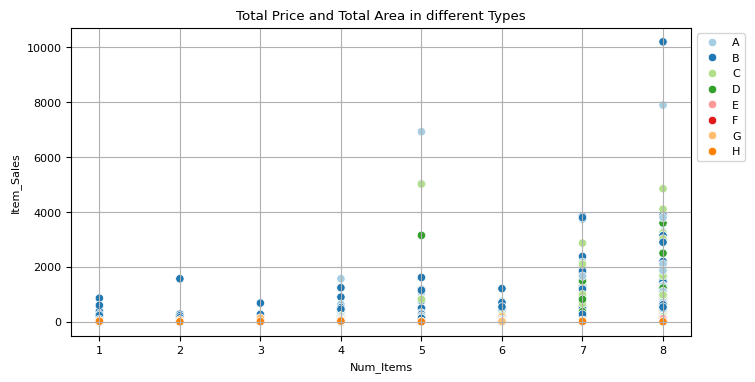

In [48]:
# Total Price and Total Area in different Types df_store , hue='Type', palette='coolwarm'sns.color_palette("Paired")
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Num_Items', y='Item_Sales', data=df_store, hue='Item', palette='Paired')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Total Price and Total Area in different Types')
plt.grid(True)
plt.show()

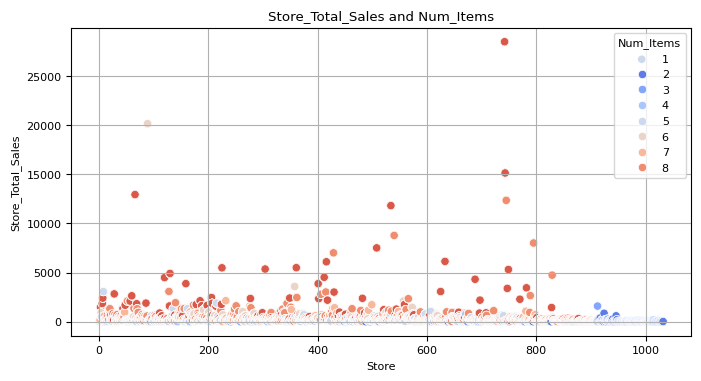

In [45]:
# set the colors
colors = sns.color_palette("coolwarm", n_colors=len(set(df_store['Num_Items'])))

# creat scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Store', y='Store_Total_Sales', data=df_store, hue='Num_Items', palette=colors)

# set legend and title
plt.legend(title='Num_Items', labels=list(set(df_store['Num_Items'])))
plt.title('Store_Total_Sales and Num_Items')
plt.xlabel('Store')
plt.ylabel('Store_Total_Sales')

plt.grid(True)
plt.show()

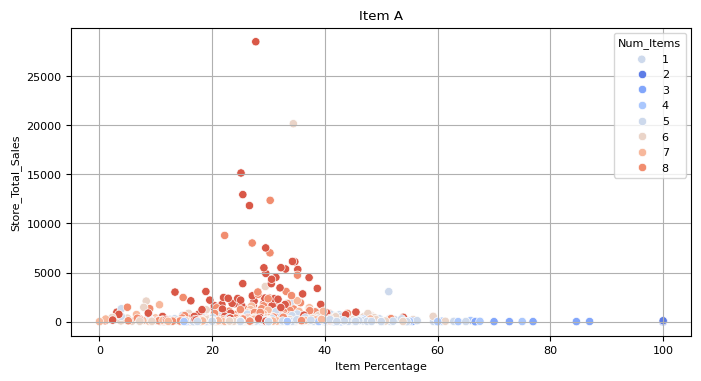

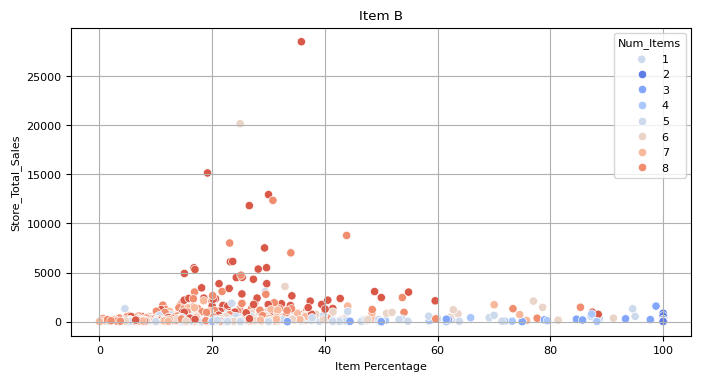

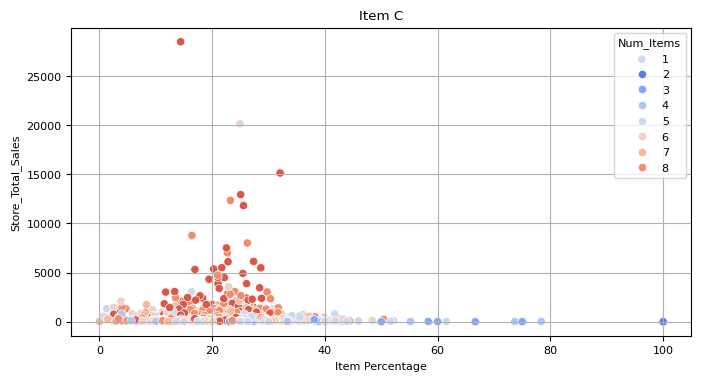

C:\Users\user\AppData\Local\Temp\ipykernel_18708\880867954.py:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.scatterplot(x='Percentage_Store', y='Store_Total_Sales', data=item_group, hue='Num_Items', palette=colors)


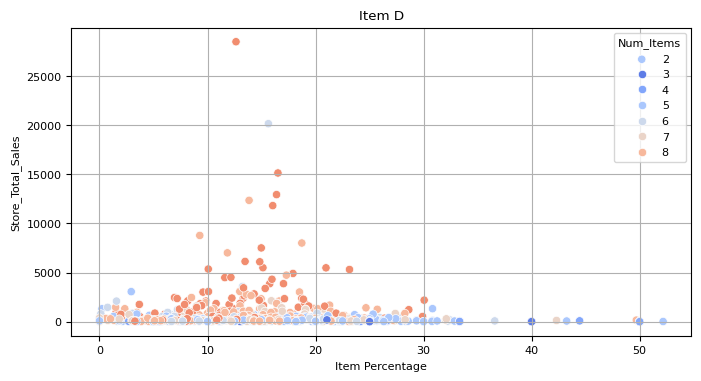

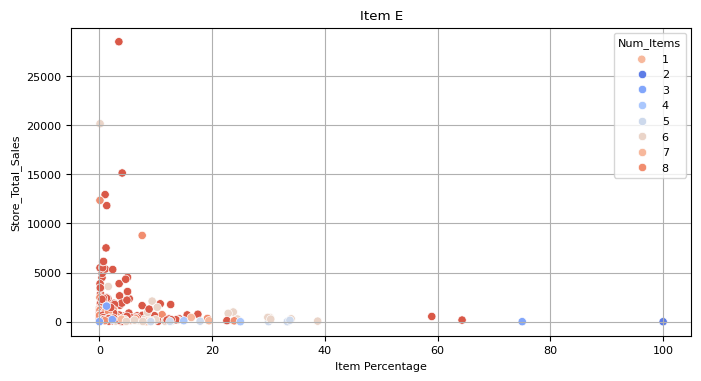

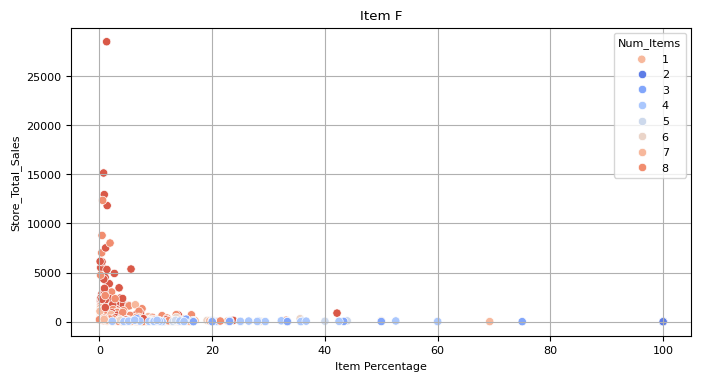

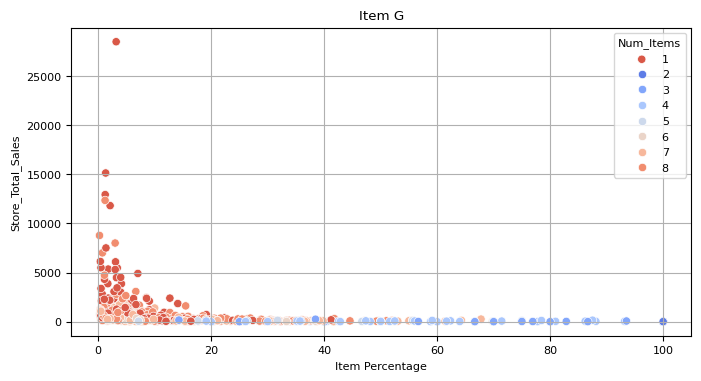

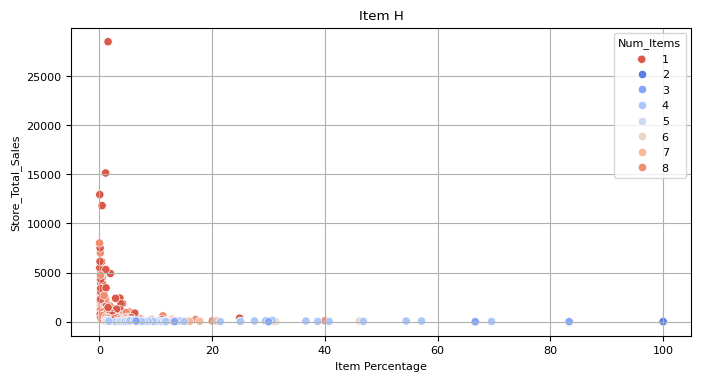

In [44]:
item_groups = df_store.groupby('Item')
n_colors=len(set(df_store['Num_Items']))

for item, item_group in item_groups:
    # set the colors
    colors = sns.color_palette("coolwarm", n_colors=n_colors)
    
    # creat scatter plot
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x='Percentage_Store', y='Store_Total_Sales', data=item_group, hue='Num_Items', palette=colors)
    
    # set legend and title
    plt.legend(title='Num_Items', labels=list(set(item_group['Num_Items'])))
    plt.title(f'Item {item}')
    plt.xlabel('Item Percentage')
    plt.ylabel('Store_Total_Sales')
    
    plt.grid(True)
    plt.show()

In [37]:
item_percentages = df_store.groupby('Item')
for item, item_group in item_percentages:
    percentage_sorted = item_group.sort_values('Percentage_Store', ascending=False)
    print(percentage_sorted.tail(10))


    Item  Store  Total_Sales  Percentage_Store  Num_Items
182    A    183         12.0          3.592814          7
604    A    605         26.0          3.443709          8
340    A    341         10.0          3.225806          4
147    A    148         30.0          3.086420          8
889    A    890          4.0          2.339181          8
647    A    648         10.0          2.262443          5
805    A    806          3.0          1.098901          6
801    A    802          1.0          1.000000          7
810    A    811          0.0          0.000000          6
867    A    868          0.0               NaN          2
     Item  Store  Total_Sales  Percentage_Store  Num_Items
1759    B    901          2.0          2.040816          7
944     B     35          1.0          1.612903          5
1572    B    690          1.0          1.587302          4
1608    B    731          3.0          1.415094          7
1321    B    424          1.0          1.351351          4
1521    

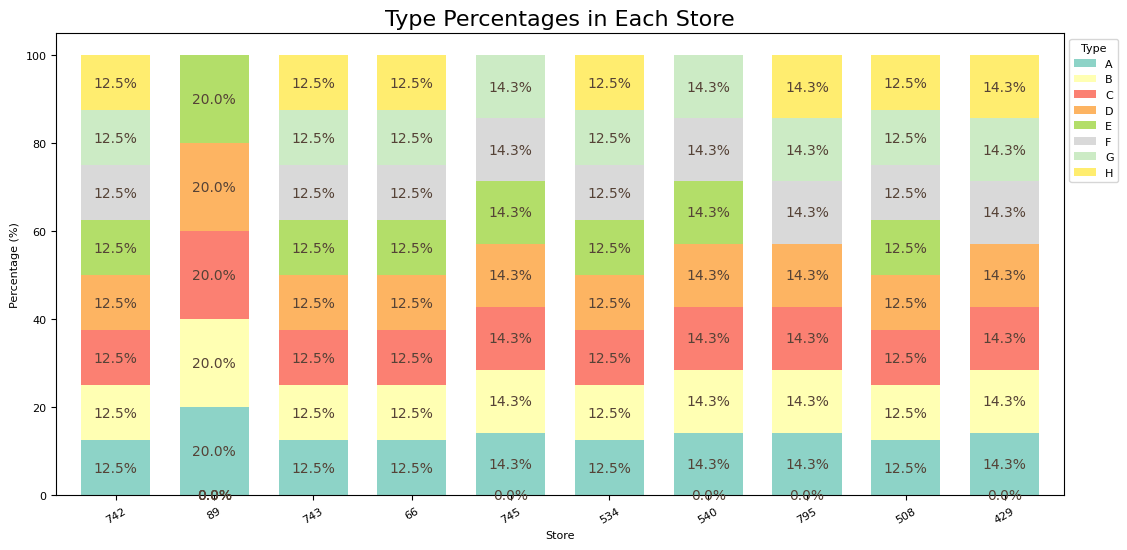

In [38]:
# Group by 'Store' and 'Item' to get counts
store_item_counts = df.groupby(['Store', 'Item']).size().unstack()

# Calculate percentages
store_item_percentages = store_item_counts.div(store_item_counts.sum(axis=1), axis=0) * 100

# Filter only the top stores
store_item_percentages_top = store_item_percentages.loc[store_names]

# Plot stacked bar chart with a different color palette
ax = store_item_percentages_top.plot(kind='bar', stacked=True, figsize=(13, 6), width=0.7, cmap='Set3')

# Add overall title
plt.title('Type Percentages in Each Store', fontsize=16)

# Add axis titles
plt.xlabel('Store')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels
plt.xticks(rotation=30)

# Add annotations
for idx, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='#554236')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Type')

plt.show()
